# **Q1. Solution** 
- `Scipy`

### **1. fitting it to the periodic function**


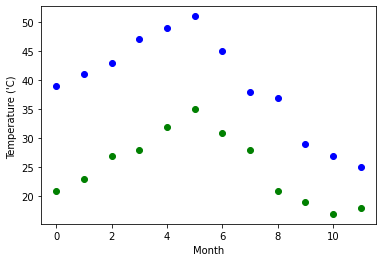

In [38]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


import matplotlib.pyplot as plt

months = np.arange(12)
plt.plot(months, temp_max, 'bo')
plt.plot(months, temp_min, 'go')
plt.xlabel('Month')
plt.ylabel("Temperature ('C) ")
plt.show()

In [57]:
from scipy import optimize
def temperature(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temperature, months, temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(temperature, months, temp_min, [-40, 20, 0])

### **2. plot the fit**

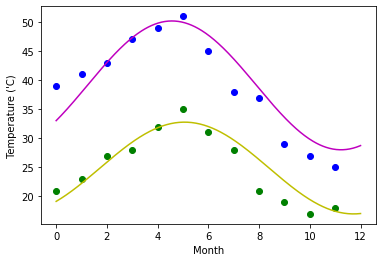

In [58]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'bo')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'go')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel(" Temperature ('C) ")

plt.show()

# **Q2. Solution**
- `Matplotlib`

#### Load Dataset

In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv') 
data.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### **1. Create a pie chart presenting the male/female proportion**

In [31]:
gender_count = data['sex'].value_counts()
gender_data = pd.DataFrame(gender_count)
gender_data

,sex
male,843
female,466


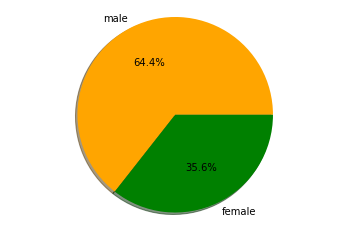

In [30]:
labels = ['male','female']  
plt.pie(gender_data.sex, labels=labels, autopct='%1.1f%%', shadow=True, colors = ['orange','green']) 
plt.axis('equal') 
plt.show()

### **2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**

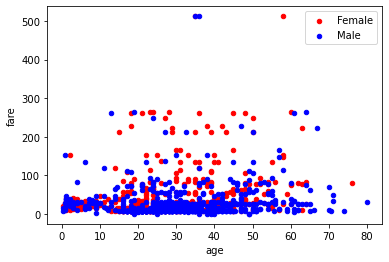

In [52]:
cat_female = data[data.sex=='female'].plot.scatter('age', 'fare', color='red', label='Female') 
data[data.sex=='male'].plot.scatter('age', 'fare',color='blue', label='Male', ax=cat_female) 

plt.show()